# Northwestern County Housing Renovation Analysis

Author: Armun Shakeri

# Overview

This project analyzes housing renovations and how renovations might increase the value of a property owners home. 

# Business Problem

Recently property values have been increasing throughout the United States. For those wanting to sell their homes, home renovations might be a way homeowners can increase their property value. This project analyzes these renovations and explores if they do have a positive increase on the house's value. 

# Data Understanding

The following data is imported from KC housing data and shows different information about homes such as the date a home was sold, price, bedrooms...etc. For this project we will only use some of the data available, others will be removed.

In [1]:
# Import standard packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
# Run code to explore the data
kc = pd.read_csv('data/kc_house_data.csv')

In [3]:
# this shows information regarding variables in kc dataframe 
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
# Below we drop values that are irrelevant towards first time hombe buyer analysis 
kc = kc.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'zipcode', 'sqft_living15', 
        'sqft_lot15', 'waterfront'], axis=1)
kc.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,lat,long
0,7129300520,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1955,0.0,47.5112,-122.257
1,6414100192,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,1951,1991.0,47.7210,-122.319
2,5631500400,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,1933,NaN,47.7379,-122.233
3,2487200875,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1965,0.0,47.5208,-122.393
4,1954400510,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1987,0.0,47.6168,-122.045


In [5]:
# Here we drop all Na values. 
kc=kc.dropna()

In [6]:
# First time home buyers will not be looking at homes over $1,000,000. Homes above that threshold will be removed. 
# Homes with bedrooms at or above 4, and greater than 2 floors will also be removed. 
kc = kc[kc.price<=1000000]
kc.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,lat,long
0,7129300520,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1955,0.0,47.5112,-122.257
1,6414100192,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,1951,1991.0,47.7210,-122.319
3,2487200875,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1965,0.0,47.5208,-122.393
4,1954400510,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1987,0.0,47.6168,-122.045
6,1321400060,257500.0,3,2.25,1715,6819,2.0,Average,7 Average,1995,0.0,47.3097,-122.327


In [7]:
# changed year renovated from float64 to int
kc.yr_renovated=kc.yr_renovated.astype(int)

In [8]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16562 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            16562 non-null  int64  
 1   price         16562 non-null  float64
 2   bedrooms      16562 non-null  int64  
 3   bathrooms     16562 non-null  float64
 4   sqft_living   16562 non-null  int64  
 5   sqft_lot      16562 non-null  int64  
 6   floors        16562 non-null  float64
 7   condition     16562 non-null  object 
 8   grade         16562 non-null  object 
 9   yr_built      16562 non-null  int64  
 10  yr_renovated  16562 non-null  int64  
 11  lat           16562 non-null  float64
 12  long          16562 non-null  float64
dtypes: float64(5), int64(6), object(2)
memory usage: 1.8+ MB


In [9]:
kc.sort_values('yr_renovated', ascending=False).head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,lat,long
7090,9141100005,285000.0,4,3.50,2770,10505,2.0,Average,8 Good,1940,2015,47.7412,-122.355
3153,6821100195,830000.0,4,3.00,2020,6000,1.0,Average,8 Good,1968,2015,47.6563,-122.401
5678,2202500255,335000.0,3,2.00,1210,9926,1.0,Good,7 Average,1954,2015,47.5731,-122.135
16669,5113000420,420000.0,4,2.75,2400,20000,1.0,Average,8 Good,1961,2015,47.4556,-122.087
15673,3585900190,825000.0,3,2.50,3400,38400,1.0,Average,8 Good,1955,2015,47.7611,-122.372


# Data Modeling

In [10]:
# Here shows the different statistical values of the kc dataframe
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,lat,long
count,1.656200e+04,16562.000000,16562.000000,16562.000000,16562.000000,1.656200e+04,16562.000000,16562.000000,16562.000000,16562.000000,16562.000000
mean,4.613975e+09,468459.640442,3.328342,2.043865,1959.379785,1.473370e+04,1.473343,1970.856660,72.281790,47.555126,-122.212677
std,2.877256e+09,196560.363931,0.913586,0.700372,754.723851,4.108051e+04,0.534792,29.096988,372.842219,0.141599,0.142678
min,1.000102e+06,80000.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000,0.000000,47.155900,-122.519000
25%,2.146050e+09,314275.000000,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,1952.000000,0.000000,47.457100,-122.330000
50%,3.916950e+09,435000.000000,3.000000,2.000000,1850.000000,7.500000e+03,1.000000,1974.000000,0.000000,47.565200,-122.231000
75%,7.343900e+09,594368.250000,4.000000,2.500000,2420.000000,1.025300e+04,2.000000,1996.000000,0.000000,47.679375,-122.121000
max,9.895000e+09,1000000.000000,33.000000,7.500000,7120.000000,1.651359e+06,3.500000,2015.000000,2015.000000,47.777600,-121.315000


In [11]:
#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

#for xcol, ax in zip(['bedrooms', 'bathrooms', 'floors', 'yr_built'], axes):
#    kc.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

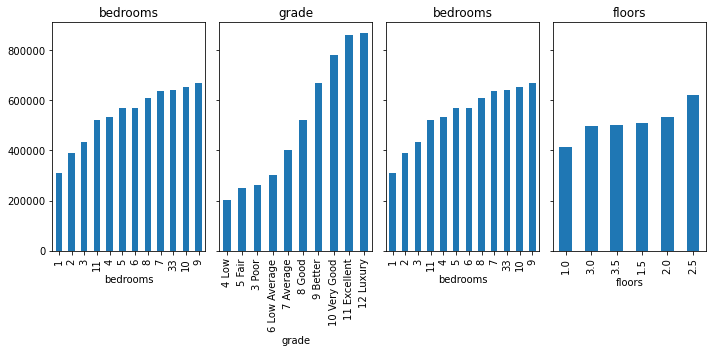

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,5), sharey=True)

categoricals = ['bedrooms', 'grade', 'bedrooms', 'floors']

for col, ax in zip(categoricals, axes.flatten()):
    (kc.groupby(col)            # group values together by column of interest
        .mean()['price']        # take the mean of the price for each group   
        .sort_values()          # sort the groups in ascending order
        .plot                   
        .bar(ax=ax))            # create a bar graph on the ax
    
    ax.set_title(col)           # make the title the name of the column

fig.tight_layout()




In [13]:
# trying to see if home renovations increases the value of the home. 
# plotting only renovated homes
# colors differentiate grade of home
# use line of best fit?


fig, ax = plt.subplots()

colors = {'4 Low':'red', '5 Fair':'blue', '3 Poor':'yellow', '6 Low Average':'orange', '7 Average':'purple', 
          '8 Good':'green', '9 Better':'brown', '10 Very Good':'black', '11 Excellent':'maroon'}

grouped = kc.groupby('grade')
for key, group in grouped:
    if yr_renovated = 0:
        group.plot(ax=ax, kind='scatter', x='yr_renovated', y='price', label=key, color=colors[key])
    else:
        
plt.show()

SyntaxError: invalid syntax (<ipython-input-13-67dcb7ba5f03>, line 14)

In [14]:
kc['is_renovated']=kc.yr_renovated.map(lambda x : 1 if x > 0 else 0)

In [15]:
kc.is_renovated.value_counts()

0    15962
1      600
Name: is_renovated, dtype: int64

In [16]:
kc.groupby('is_renovated').mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,lat,long
is_renovated,,,,,,,,,,,
0,4.623113e+09,465349.928392,3.328530,2.041082,1957.044606,14667.707931,1.474032,1972.084764,0.000000,47.554438,-122.210963
1,4.370879e+09,551188.346667,3.323333,2.117917,2021.503333,16489.288333,1.455000,1938.185000,1995.218333,47.573441,-122.258258


<AxesSubplot:xlabel='long', ylabel='lat'>

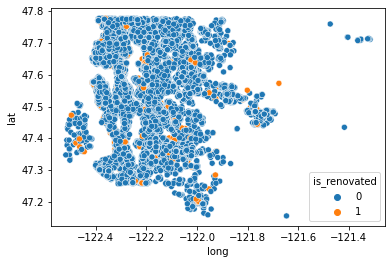

In [18]:
sns.scatterplot(x="long", y="lat", hue="is_renovated", data=kc)